In [36]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
from scipy import signal

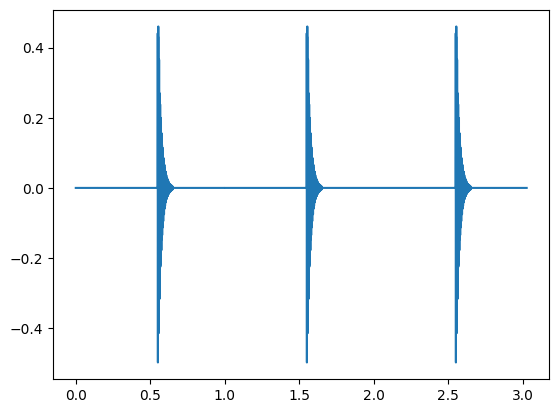

In [37]:
path = 'drip.wav'
pluc_window = 100
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

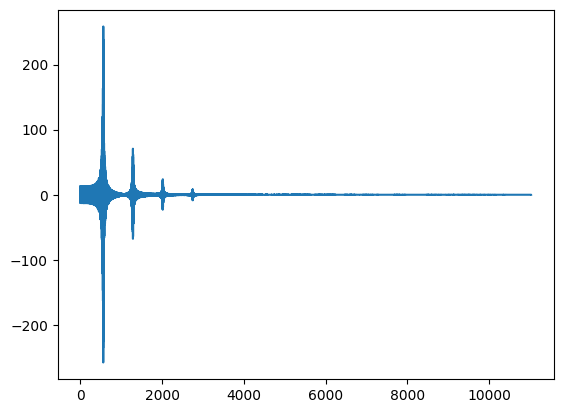

In [38]:
audio_fft = rfft(audio)
sample_period = 1/sample_rate
W=rfftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

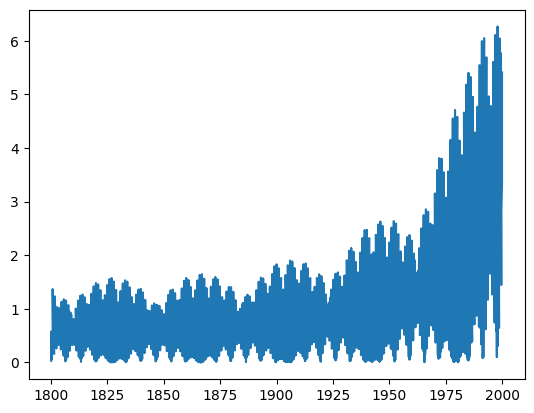

In [39]:
plt.plot(W[(W>1800)&(W<2000)],abs(audio_fft[(W>1800)&(W<2000)]))

In [40]:
def fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=rfftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i]-window > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i] > fig_a[-1]:
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(463.0715281212067, 663.0715281212067),
 (667.9449714516927, 867.9449714516927),
 (1187.0678415681339, 1387.0678415681339),
 (1389.9586386728408, 1589.9586386728408),
 (1918.003416805287, 2118.003416805287),
 (2146.99905588275, 2346.99905588275),
 (2649.93031515533, 2849.93031515533),
 (250, 750)]

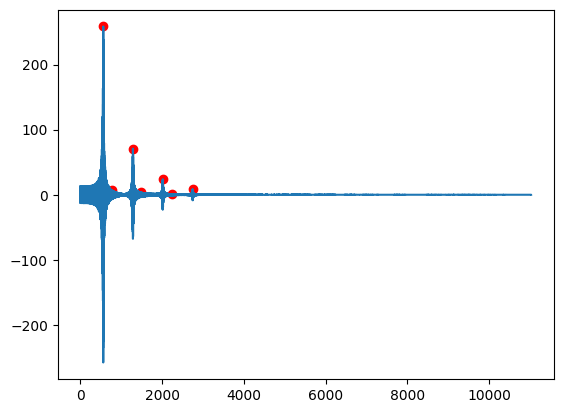

In [41]:
audio_fft, W = fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,pluc_window)
ranges.append((250,750))
ranges

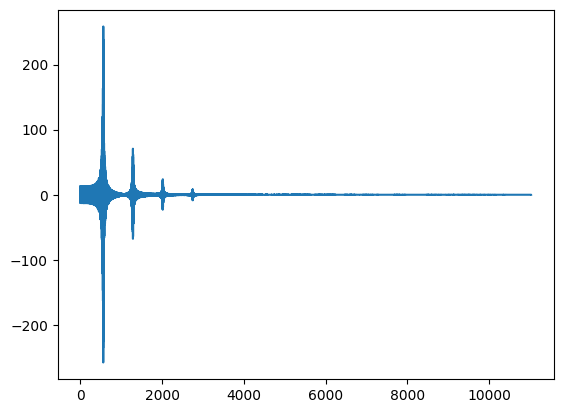

In [42]:
plt.plot(W,audio_fft)


In [48]:
print(ranges)
def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,ranges[i][1]-ranges[i][0],len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-20*han/20) 
    plt.plot(W,cuttoff)
    return cuttoff


[(463.0715281212067, 663.0715281212067), (667.9449714516927, 867.9449714516927), (1187.0678415681339, 1387.0678415681339), (1389.9586386728408, 1589.9586386728408), (1918.003416805287, 2118.003416805287), (2146.99905588275, 2346.99905588275), (2649.93031515533, 2849.93031515533), (250, 750)]


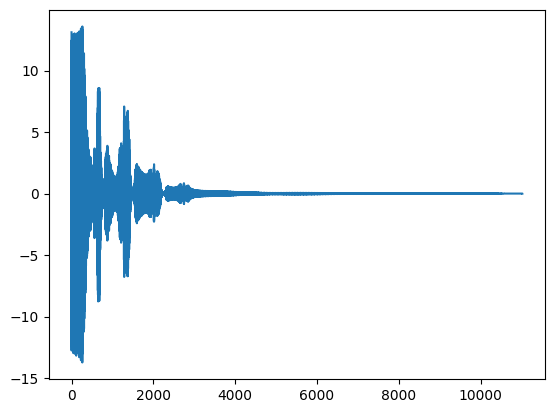

In [44]:

audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))

Audio(audio_final, rate = sample_rate)

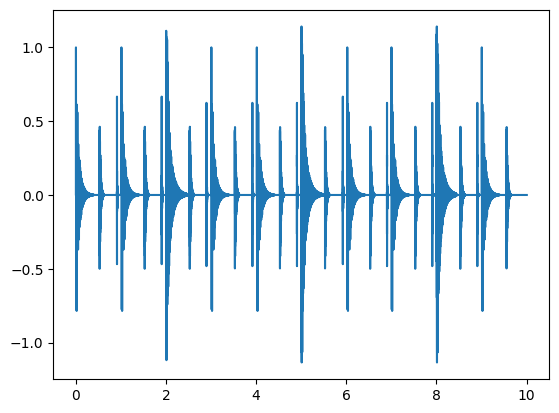

In [45]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)


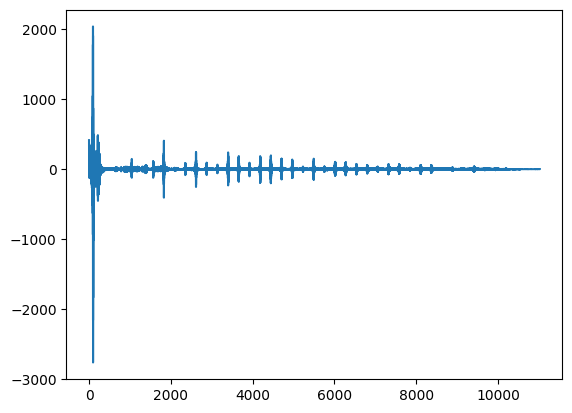

In [46]:
audio_fft, W = fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))
Audio(audio_final, rate = sample_rate)

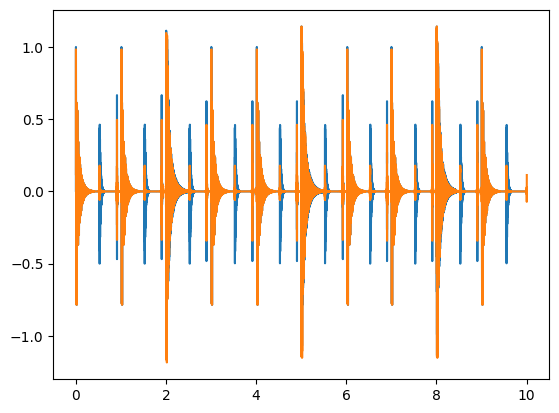

In [47]:
time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.plot(time,audio_final)